In [0]:
sc

SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/dhyey.lalseta@ucalgary.ca/export_1.csv")

In [0]:
from pyspark.sql.functions import trim

df1 = df1.withColumn('OCC_DOW', trim(df1.OCC_DOW))

In [0]:
df1.head(5)

Out[6]: [Row(LONG_WGS84='-79.3067569', LAT_WGS84='43.7346524', NEIGHBOURHOOD_158='Victoria Village', OCC_DATE='2013/12/31 05:00:00+00', OCC_DOW='Tuesday', OCC_HOUR='17'),
 Row(LONG_WGS84='-79.23618872', LAT_WGS84='43.72184709', NEIGHBOURHOOD_158='Cliffcrest', OCC_DATE='2014/01/01 05:00:00+00', OCC_DOW='Wednesday', OCC_HOUR='15'),
 Row(LONG_WGS84='-79.52947785', LAT_WGS84='43.61847223', NEIGHBOURHOOD_158='Etobicoke City Centre', OCC_DATE='2013/12/25 05:00:00+00', OCC_DOW='Wednesday', OCC_HOUR='0'),
 Row(LONG_WGS84='-79.59536439', LAT_WGS84='43.74428061', NEIGHBOURHOOD_158='Mount Olive-Silverstone-Jamestown', OCC_DATE='2014/01/01 05:00:00+00', OCC_DOW='Wednesday', OCC_HOUR='15'),
 Row(LONG_WGS84='-79.51523257', LAT_WGS84='43.68272675', NEIGHBOURHOOD_158='Edenbridge-Humber Valley', OCC_DATE='2014/01/01 05:00:00+00', OCC_DOW='Wednesday', OCC_HOUR='19')]

In [0]:
"""most likely weekday for accident"""
wd_df = df1.select(df1.OCC_DOW)
display(wd_df.groupBy(wd_df.OCC_DOW).count())

OCC_DOW count Wednesday 8333 Tuesday 8149 null 4 Friday 8016 Thursday 8429 Saturday 6996 Monday 7775 Sunday 7072

In [0]:
n_df = df1.select(df1.NEIGHBOURHOOD_158).groupBy(df1.NEIGHBOURHOOD_158).count().sort('count')

In [0]:
display(n_df)

NEIGHBOURHOOD_158 count North Toronto 64 Guildwood 66 Woodbine-Lumsden 67 Blake-Jones 69 Broadview North 77 NSA 82 Playter Estates-Danforth 88 Ionview 89 University 92 Old East York 99 Yonge-St.Clair 101 South Eglinton-Davisville 103 Bay-Cloverhill 107 West Queen West 110 Lambton Baby Point 110 Danforth 110 Regent Park 111 Woodbine Corridor 115 Dufferin Grove 122 Caledonia-Fairbank 124 Taylor-Massey 127 Cabbagetown-South St.James Town 128 Beechborough-Greenbrook 129 Bendale South 131 Flemingdon Park 132 Dovercourt Village 137 Fort York-Liberty Village 142 Avondale 149 Casa Loma 150 Palmerston-Little Italy 153 Yonge-Eglinton 154 North Riverdale 154 Centennial Scarborough 157 Little Portugal 160 Oakridge 161 North St.James Town 164 Roncesvalles 165 Etobicoke West Mall 165 Corso Italia-Davenport 169 Church-Wellesley 170 Weston-Pelham Park 173 Bayview Woods-Steeles 174 Wychwood 174 Danforth East York 176 Harbourfront-CityPlace 176 Pleasant View 179 East L'Amoreaux 181 Thorncliffe Park 182 New Toronto 183 High Park North 187 Maple Leaf 191 Markland Wood 191 Parkwoods-O'Connor Hills 193 Rustic 195 Long Branch 196 Trinity-Bellwoods 199 Greenwood-Coxwell 205 Runnymede-Bloor West Village 205 St Lawrence-East Bayfront-The Islands 206 Scarborough Village 210 South Parkdale 214 Yonge-Doris 215 Humber Bay Shores 217 L'Amoreaux West 218 Humber Heights-Westmount 219 Victoria Village 224 Mount Pleasant East 225 Yonge-Bay Corridor 226 Henry Farm 228 Fenside-Parkwoods 228 Bridle Path-Sunnybrook-York Mills 228 Highland Creek 230 Morningside 234 Cliffcrest 235 Keelesdale-Eglinton West 240 Mount Dennis 246 The Beaches 247 Hillcrest Village 247 O'Connor-Parkview 249 Forest Hill North 250 Briar Hill-Belgravia 250 Humewood-Cedarvale 251 Willowdale West 256 Birchcliffe-Cliffside 258 Junction-Wallace Emerson 268 Alderwood 270 East End-Danforth 272 Malvern West 274 Newtonbrook East 279 Eglinton East 282 Kennedy Park 289 Kingsway South 293 High Park-Swansea 296 Elms-Old Rexdale 297 Oakwood Village 301 East Willowdale 304 Junction Area 306 Steeles 308 Downtown Yonge East 317 Princess-Rosethorn 321 Annex 323 Kensington-Chinatown 324 West Rouge 325 Bayview Village 327 Malvern East 327 Mimico-Queensway 334 Thistletown-Beaumond Heights 339 Englemount-Lawrence 342 Golfdale-Cedarbrae-Woburn 355 Moss Park 359 Lawrence Park North 359 Edenbridge-Humber Valley 361 Forest Hill South 361 Rexdale-Kipling 370 Wellington Place 384 Tam O'Shanter-Sullivan 391 Banbury-Don Mills 393 Lansing-Westgate 396 Leaside-Bennington 399 Bathurst Manor 403 West Hill 414 South Riverdale 415 Westminster-Branson 420 St.Andrew-Windfields 422 Lawrence Park South 424 Don Valley Village 433 Agincourt North 434 Woburn North 437 Brookhaven-Amesbury 451 Eringate-Centennial-West Deane 468 Rosedale-Moore Park 473 Rockcliffe-Smythe 486 Agincourt South-Malvern West 509 Bendale-Glen Andrew 529 Downsview 537 Islington 537 Clairlea-Birchmount 543 Morningside Heights 555 Stonegate-Queensway 557 Pelmo Park-Humberlea 567 Black Creek 572 Willowridge-Martingrove-Richview 576 Dorset Park 580 Weston 588 Kingsview Village-The Westway 628 Humbermede 632 Clanton Park 673 Newtonbrook West 726 Mount Olive-Silverstone-Jamestown 779 Bedford Park-Nortown 812 Glenfield-Jane Heights 833 Wexford/Maryvale 842 Yorkdale-Glen Park 859 Oakdale-Beverley Heights 860 Milliken 860 Humber Summit 1009 Etobicoke City Centre 1177 York University Heights 1431 West Humber-Clairville 4563

In [0]:
"""least likely neighbourhoods"""
n_df.head(5)

Out[17]: [Row(NEIGHBOURHOOD_158='North Toronto', count=64),
 Row(NEIGHBOURHOOD_158='Guildwood', count=66),
 Row(NEIGHBOURHOOD_158='Woodbine-Lumsden', count=67),
 Row(NEIGHBOURHOOD_158='Blake-Jones', count=69),
 Row(NEIGHBOURHOOD_158='Broadview North', count=77)]

In [0]:
"""most likely neighbourhoods"""
n_df.tail(5)

Out[18]: [Row(NEIGHBOURHOOD_158='Milliken', count=860),
 Row(NEIGHBOURHOOD_158='Humber Summit', count=1009),
 Row(NEIGHBOURHOOD_158='Etobicoke City Centre', count=1177),
 Row(NEIGHBOURHOOD_158='York University Heights', count=1431),
 Row(NEIGHBOURHOOD_158='West Humber-Clairville', count=4563)]

In [0]:

from pyspark.sql.functions import to_timestamp
pre_pd_df = df1.select(to_timestamp(df1.OCC_DATE, 'yyyy/MM/dd HH:mm:ss+00').alias('dt'))

In [0]:
from pyspark.sql.functions import date_format
date_count = pre_pd_df.select(date_format(pre_pd_df.dt, 'yyyy-MM-dd').alias('ds')).groupBy('ds').count().withColumnRenamed('count', 'y')

In [0]:
date_count.toPandas()

ds 
 y 
 
 
 
 
 0 
 2014-02-16 
 6 
 
 
 1 
 2014-02-22 
 11 
 
 
 2 
 2014-05-27 
 8 
 
 
 3 
 2014-12-13 
 11 
 
 
 4 
 2015-05-01 
 8 
 
 
 ... 
 ... 
 ... 
 
 
 3599 
 2023-08-17 
 28 
 
 
 3600 
 2023-08-30 
 31 
 
 
 3601 
 2023-09-14 
 33 
 
 
 3602 
 2023-06-28 
 27 
 
 
 3603 
 2023-08-27 
 24 
 
 
 
 3604 rows × 2 columns

In [0]:
from prophet import Prophet

m = Prophet()
m.fit(date_count.toPandas())

21:11:31 - cmdstanpy - INFO - Chain [1] start processing
21:11:32 - cmdstanpy - INFO - Chain [1] done processing


Out[9]: <prophet.forecaster.Prophet at 0x7ff2ad9f7d00>

In [0]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds 
 
 
 
 
 3964 
 2024-09-25 
 
 
 3965 
 2024-09-26 
 
 
 3966 
 2024-09-27 
 
 
 3967 
 2024-09-28 
 
 
 3968 
 2024-09-29

In [0]:
forecast = m.predict(future)

In [0]:
display(forecast)

ds trend yhat_lower yhat_upper trend_lower trend_upper additive_terms additive_terms_lower additive_terms_upper weekly weekly_lower weekly_upper yearly yearly_lower yearly_upper multiplicative_terms multiplicative_terms_lower multiplicative_terms_upper yhat 1978-04-10T00:00:00.000+0000 -6.537635 -13.267921105186801 -0.1944647583724534 -6.537635 -6.537635 -0.28068114751137485 -0.28068114751137485 -0.28068114751137485 -0.12293622205609316 -0.12293622205609316 -0.12293622205609316 -0.15774492545528168 -0.15774492545528168 -0.15774492545528168 0.0 0.0 0.0 -6.818316147511375 1990-08-10T00:00:00.000+0000 -1.3656392221084965 -8.079715896376399 5.21146664282054 -1.3656392221084965 -1.3656392221084965 0.0931742486792069 0.0931742486792069 0.0931742486792069 0.3583980850233116 0.3583980850233116 0.3583980850233116 -0.26522383634410474 -0.26522383634410474 -0.26522383634410474 0.0 0.0 0.0 -1.2724649734292897 1996-01-01T00:00:00.000+0000 0.896032627491118 -8.704775497927482 4.5418477648813855 0.896032627491118 0.896032627491118 -2.653105982852541 -2.653105982852541 -2.653105982852541 -0.12293622205492198 -0.12293622205492198 -0.12293622205492198 -2.530169760797619 -2.530169760797619 -2.530169760797619 0.0 0.0 0.0 -1.757073355361423 2000-01-01T00:00:00.000+0000 2.573343577879462 -7.688976887429991 5.146131292273958 2.573343577879462 2.573343577879462 -4.162958892783482 -4.162958892783482 -4.162958892783482 -1.6327891319857255 -1.6327891319857255 -1.6327891319857255 -2.530169760797757 -2.530169760797757 -2.530169760797757 0.0 0.0 0.0 -1.5896153149040204 2000-02-01T00:00:00.000+0000 2.608933337949303 -4.774499618785818 8.605575792262501 2.608933337949303 2.608933337949303 -0.17689905409286472 -0.17689905409286472 -0.17689905409286472 0.6431158180461646 0.6431158180461646 0.6431158180461646 -0.8200148721390292 -0.8200148721390292 -0.8200148721390292 0.0 0.0 0.0 2.4320342838564386 2001-10-10T00:00:00.000+0000 3.317284369016797 -1.430447301363981 12.602233955438184 3.317284369016797 3.317284369016797 2.43429126029643 2.43429126029643 2.43429126029643 0.9534895139935967 0.9534895139935967 0.9534895139935967 1.4808017463028338 1.4808017463028338 1.4808017463028338 0.0 0.0 0.0 5.751575629313227 2008-01-01T00:00:00.000+0000 5.92796547865615 -3.1689962946765027 11.151523872837398 5.92796547865615 5.92796547865615 -1.8870539427519462 -1.8870539427519462 -1.8870539427519462 0.6431158180457622 0.6431158180457622 0.6431158180457622 -2.5301697607977083 -2.5301697607977083 -2.5301697607977083 0.0 0.0 0.0 4.040911535904204 2008-12-01T00:00:00.000+0000 6.3125644987657274 1.0207049639847208 14.976254616948689 6.3125644987657274 6.3125644987657274 1.2846980216737642 1.2846980216737642 1.2846980216737642 -0.12293622205525943 -0.12293622205525943 -0.12293622205525943 1.4076342437290237 1.4076342437290237 1.4076342437290237 0.0 0.0 0.0 7.597262520439491 2009-07-27T00:00:00.000+0000 6.585802011559997 0.2554238240398521 13.255041932089313 6.585802011559997 6.585802011559997 0.14602419179003015 0.14602419179003015 0.14602419179003015 -0.12293622205453891 -0.12293622205453891 -0.12293622205453891 0.26896041384456904 0.26896041384456904 0.26896041384456904 0.0 0.0 0.0 6.7318262033500265 2010-09-01T00:00:00.000+0000 7.046172778915044 1.0189498148106553 14.066030453666029 7.046172778915044 7.046172778915044 0.5114045448052328 0.5114045448052328 0.5114045448052328 0.953489513993576 0.953489513993576 0.953489513993576 -0.44208496918834317 -0.44208496918834317 -0.44208496918834317 0.0 0.0 0.0 7.557577323720277 2010-10-01T00:00:00.000+0000 7.08061448220844 1.6479212673719408 14.81548260553772 7.08061448220844 7.08061448220844 1.1123844400033112 1.1123844400033112 1.1123844400033112 0.3583980850229003 0.3583980850229003 0.3583980850229003 0.7539863549804109 0.7539863549804109 0.7539863549804109 0.0 0.0 0.0 8.192998922211752 2010-10-02T00:00:00.000+0000 7.0817625389848855 -0.49922156565813525 12.973715697896184 7.0817625389848855 7.0817625389848855 -0.810514440624438 -0.8105

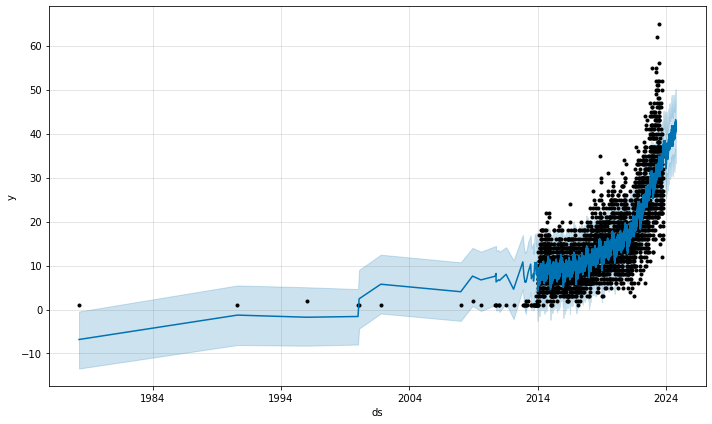

In [0]:
fig1 = m.plot(forecast)


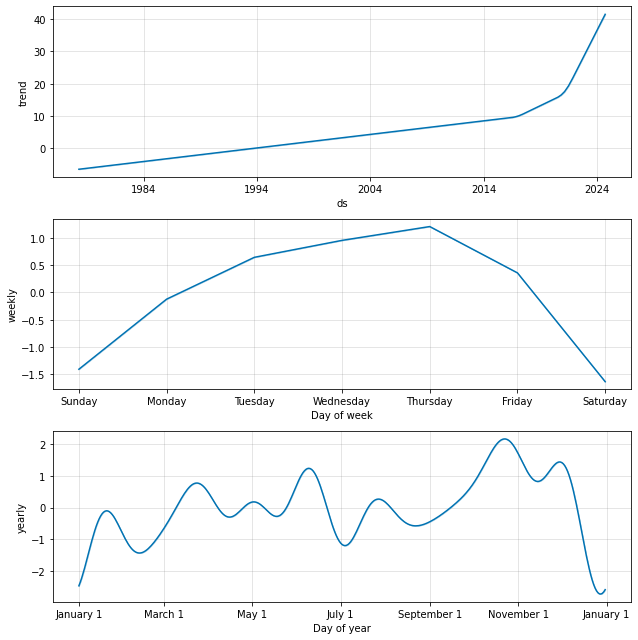

In [0]:
fig2 = m.plot_components(forecast)
